### Arduino

```
#include <RCSwitch.h>

RCSwitch tx = RCSwitch();

const int txPin = 10;

void setup() {
  tx.enableTransmit(txPin);
}

void loop() {
  tx.send(0x17, 0x1f);
  
  delay(1000);
}  
```

### Sampling

```
➜ rtl_sdr -g 10 -f 434000000 -n 8192000 10111_11111.dat
Found 1 device(s):
  0:  Realtek, RTL2838UHIDIR, SN: 00000001

Using device 0: Generic RTL2832U OEM
Found Rafael Micro R820T tuner
[R82XX] PLL not locked!
Sampling at 2048000 S/s.
Tuned to 434000000 Hz.
Tuner gain set to 8.70 dB.
Reading samples in async mode...

User cancel, exiting...
```

In [68]:
import numpy as np

from dsp import read_iq_baseband


center_freq = 434e6
sample_rate = 2048e3

iq = read_iq_baseband('../data/10111_11111.cu8')

num_samples = len(iq)

time = np.linspace(0, num_samples / sample_rate, num_samples)
signal = iq * np.exp(2j * np.pi * center_freq)

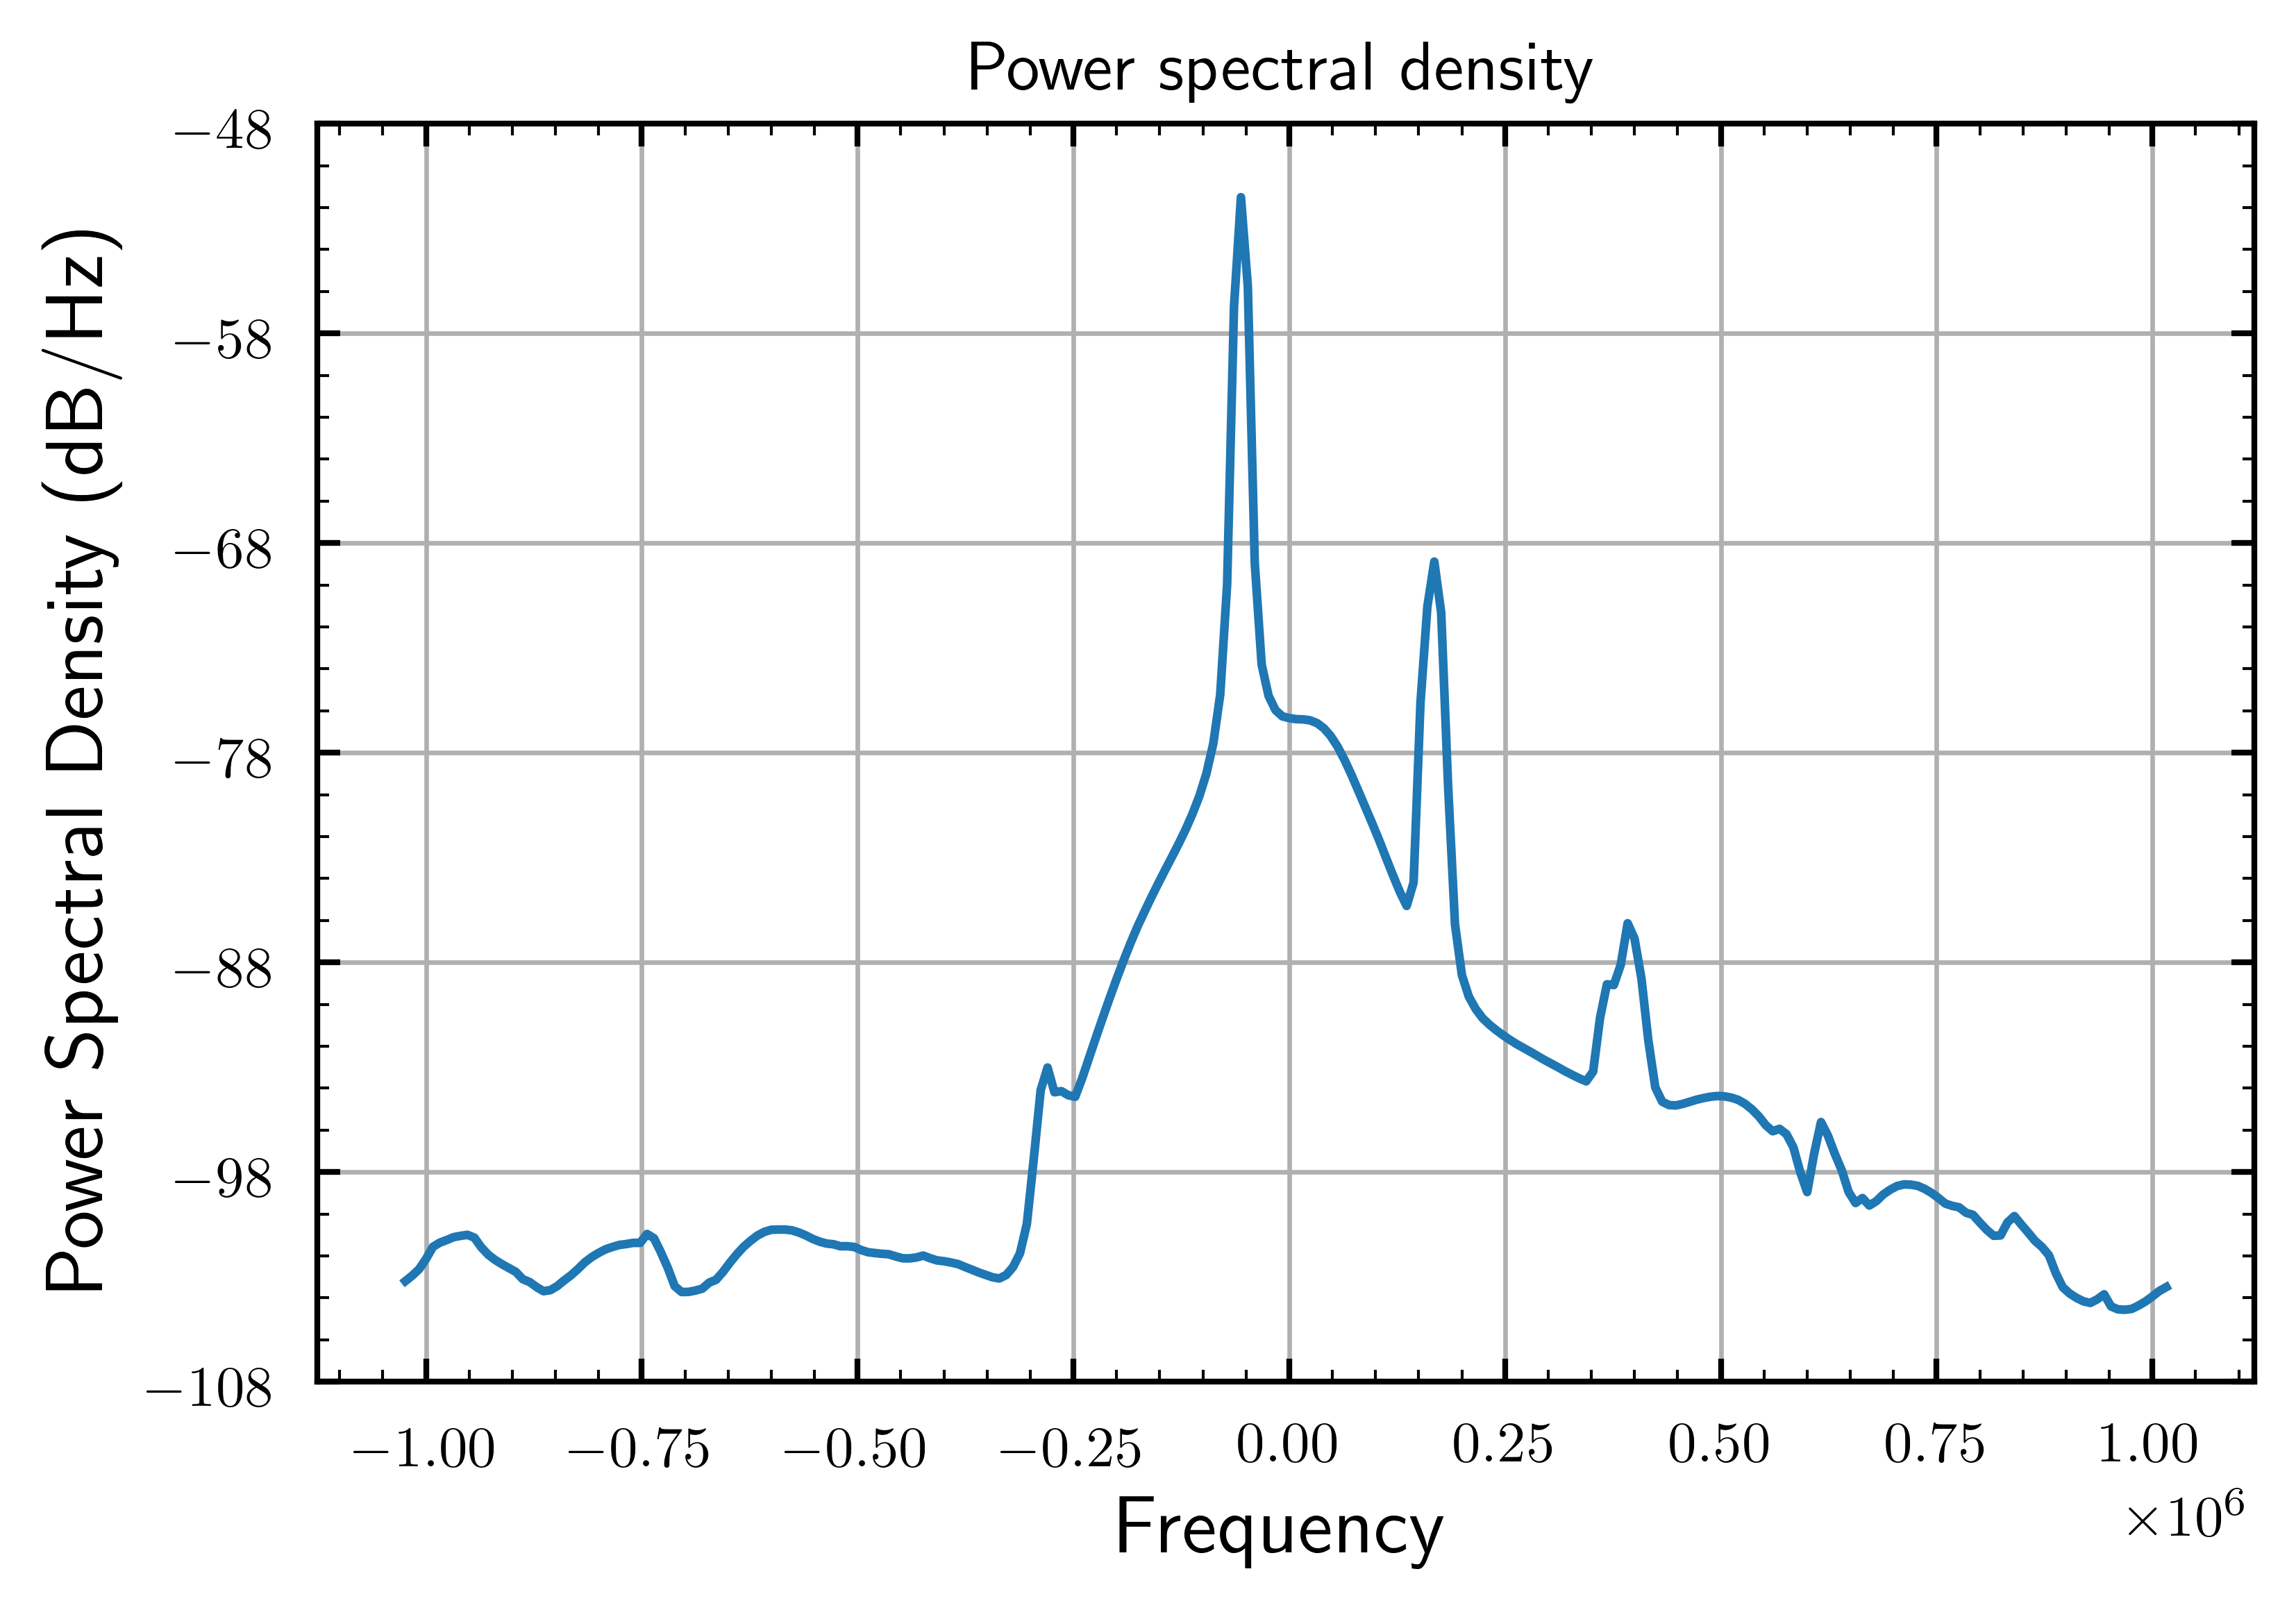

In [69]:
from matplotlib import pyplot as plt

plt.figure(dpi=300)
plt.title('Power spectral density')
plt.psd(iq, Fs=sample_rate)
plt.show()

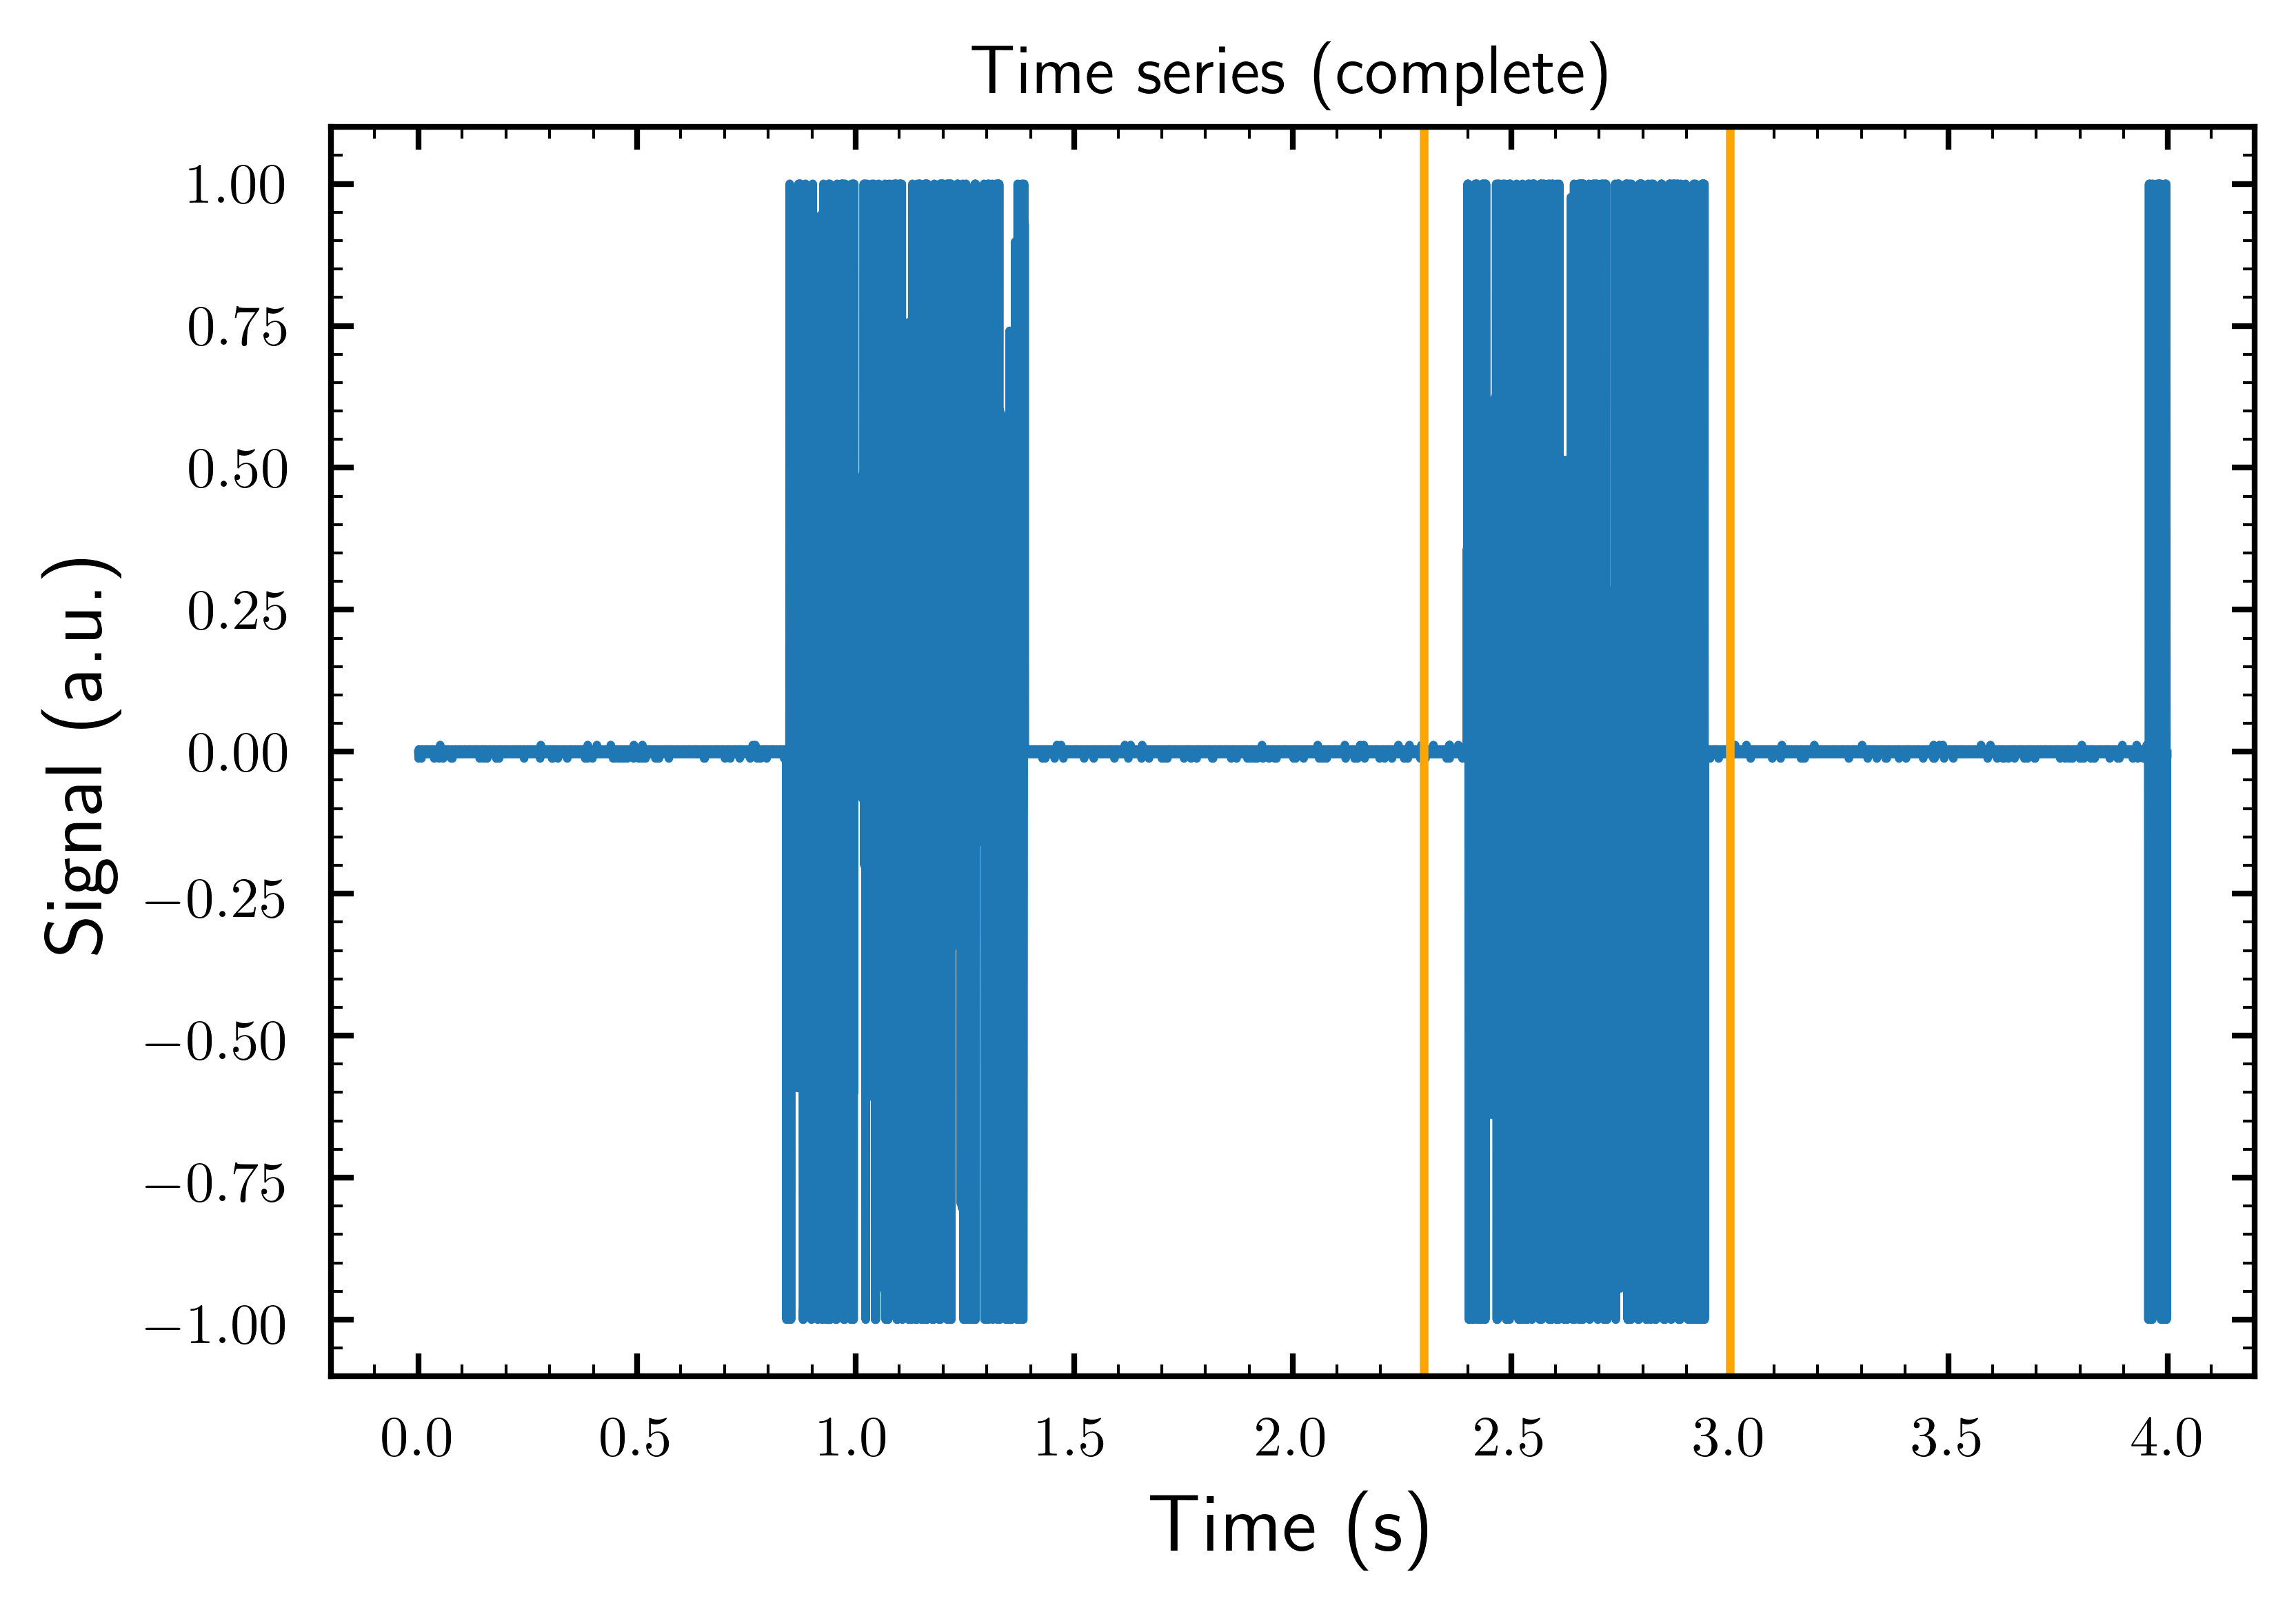

In [70]:
plt.figure(dpi=300)
plt.title('Time series (complete)')
plt.plot(time[::1000], signal[::1000].real)
plt.axvline(2.3, c='orange')
plt.axvline(3.0, c='orange')
plt.xlabel('Time (s)')
plt.ylabel('Signal (a.u.)')
plt.show()

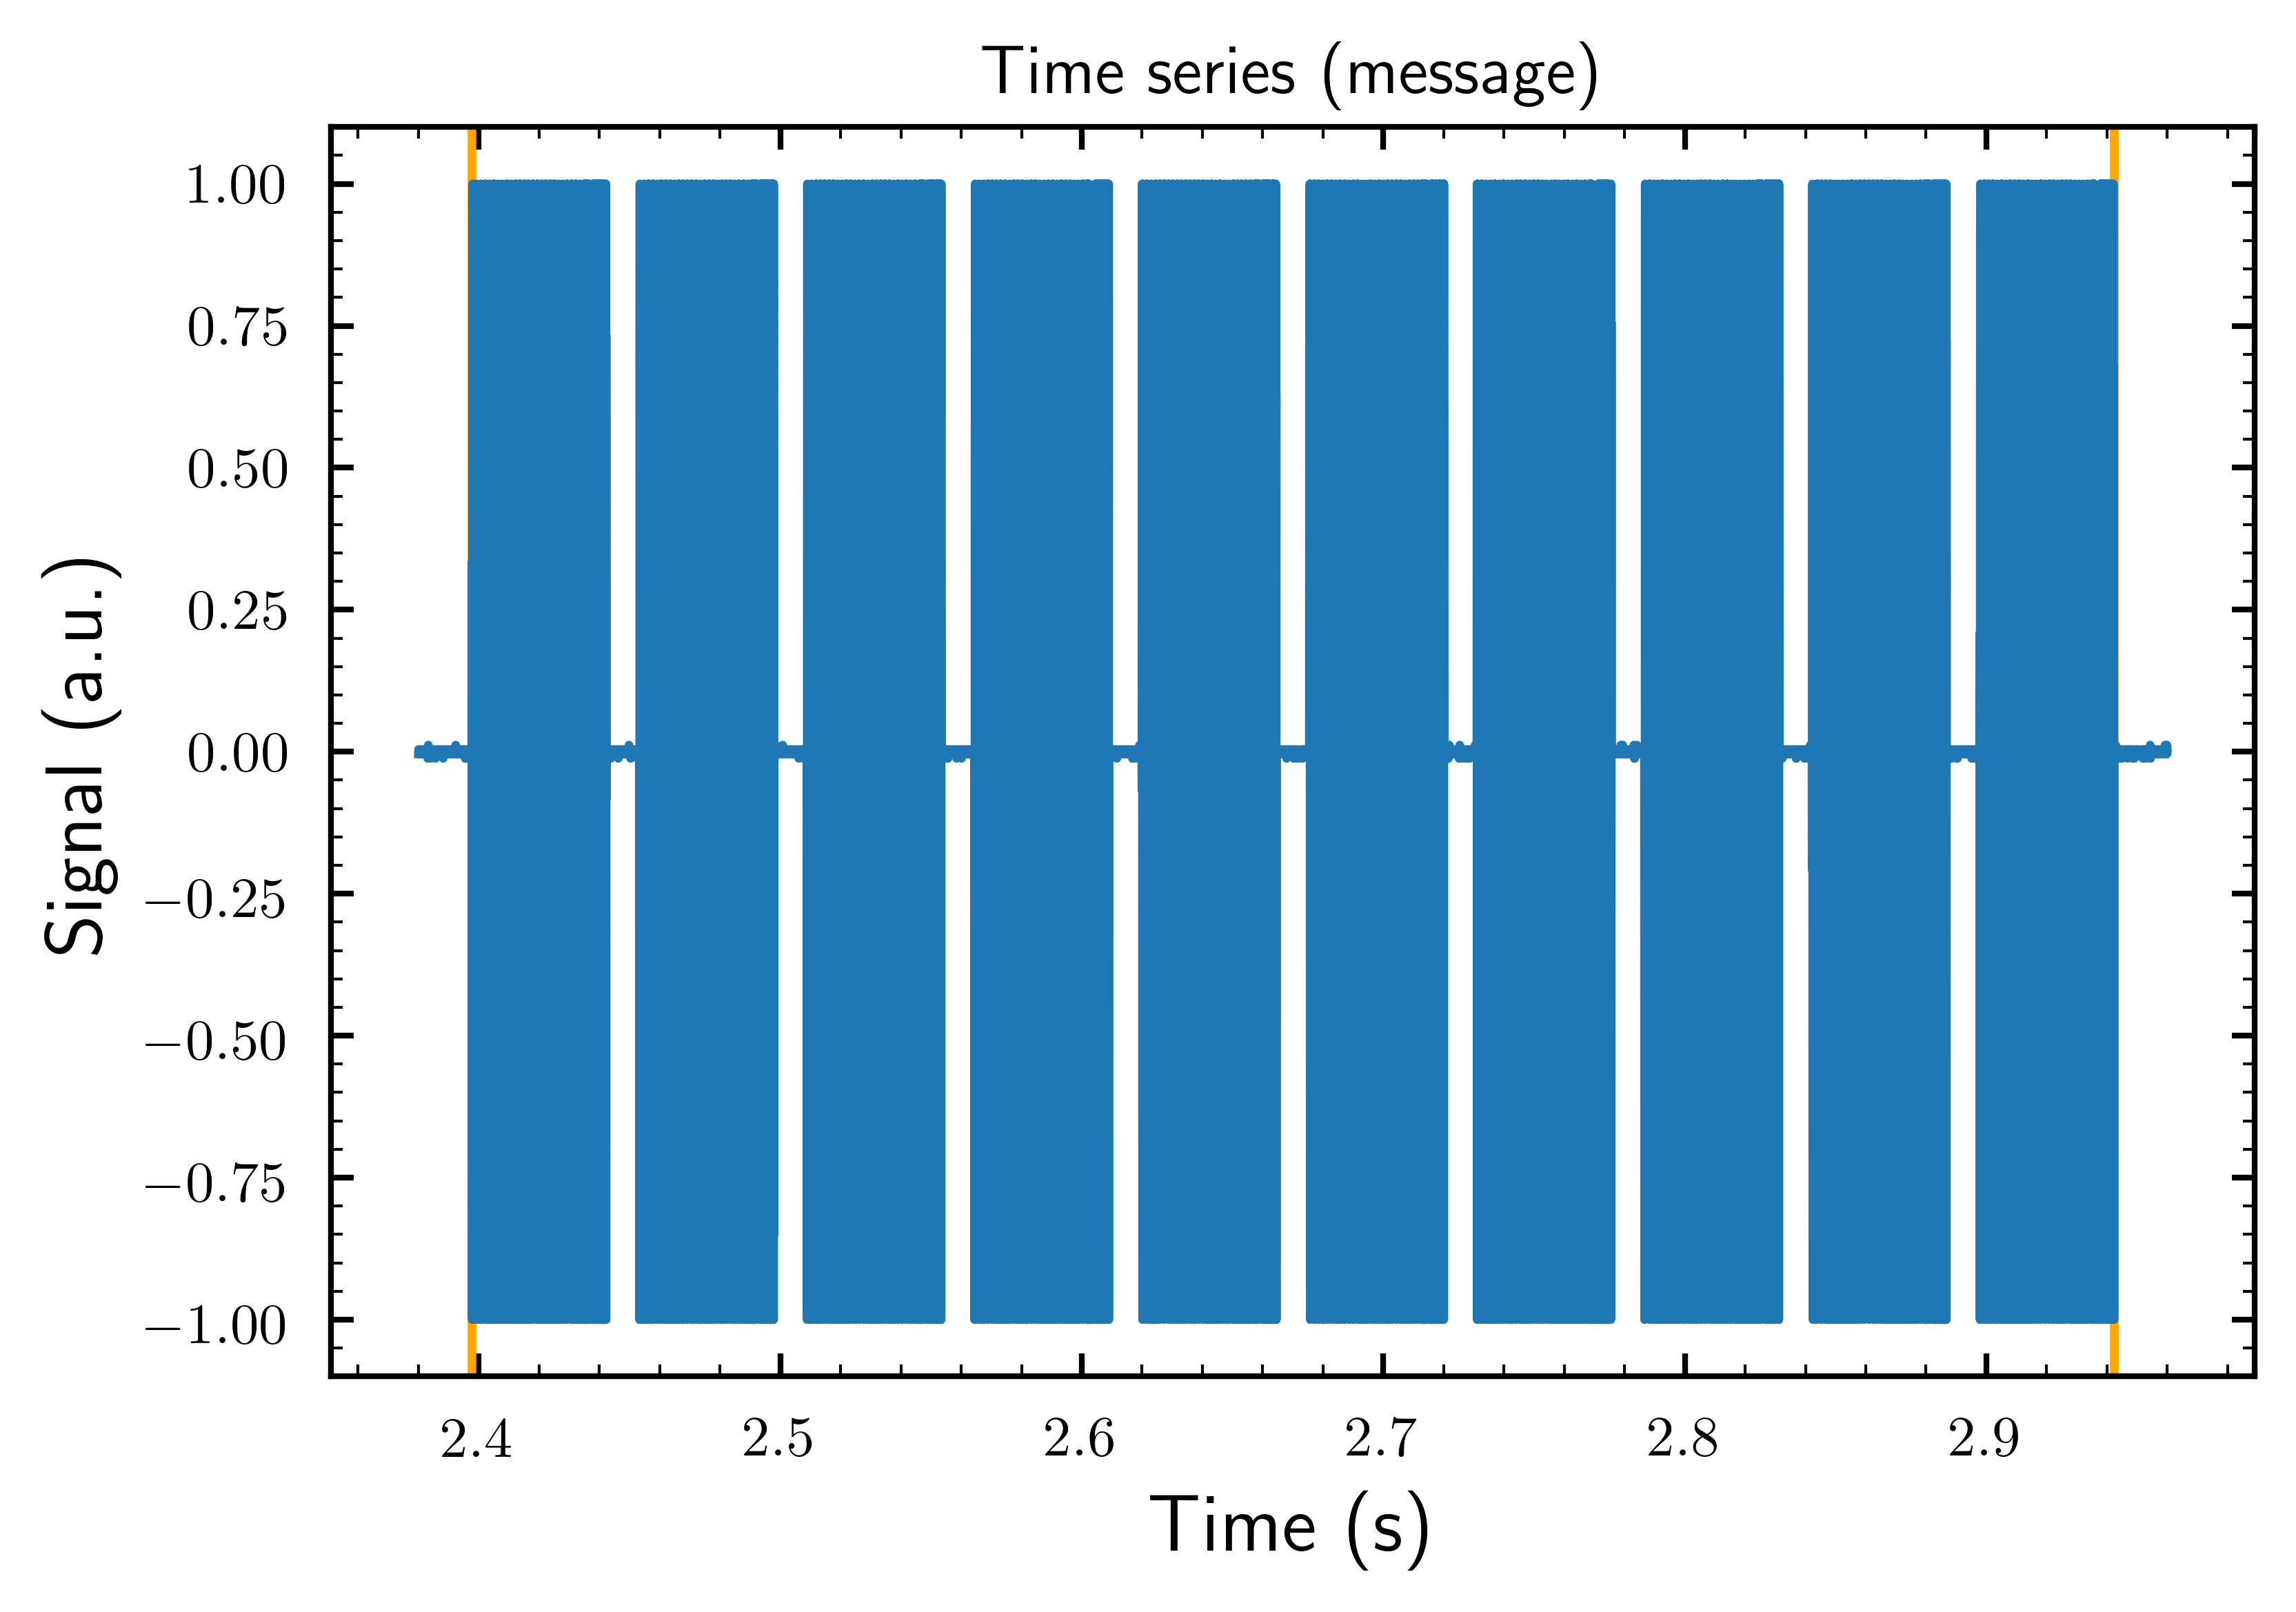

In [89]:
from dsp import select_time_window

t, s = select_time_window(time, signal, 2.38, 2.96)

pulse_train_start = t[np.argmax(s)]
pulse_train_stop = t[::-1][np.argmax(s[::-1])]

plt.figure(dpi=300)
plt.title('Time series (message)')
plt.axvline(pulse_train_start, color='orange')
plt.axvline(pulse_train_stop, color='orange')
plt.plot(t[::100], s[::100].real)
plt.xlabel('Time (s)')
plt.ylabel('Signal (a.u.)')
plt.show()

In [90]:
pulse_train_length = pulse_train_stop - pulse_train_start
pulse_train_length

0.5446260430451715

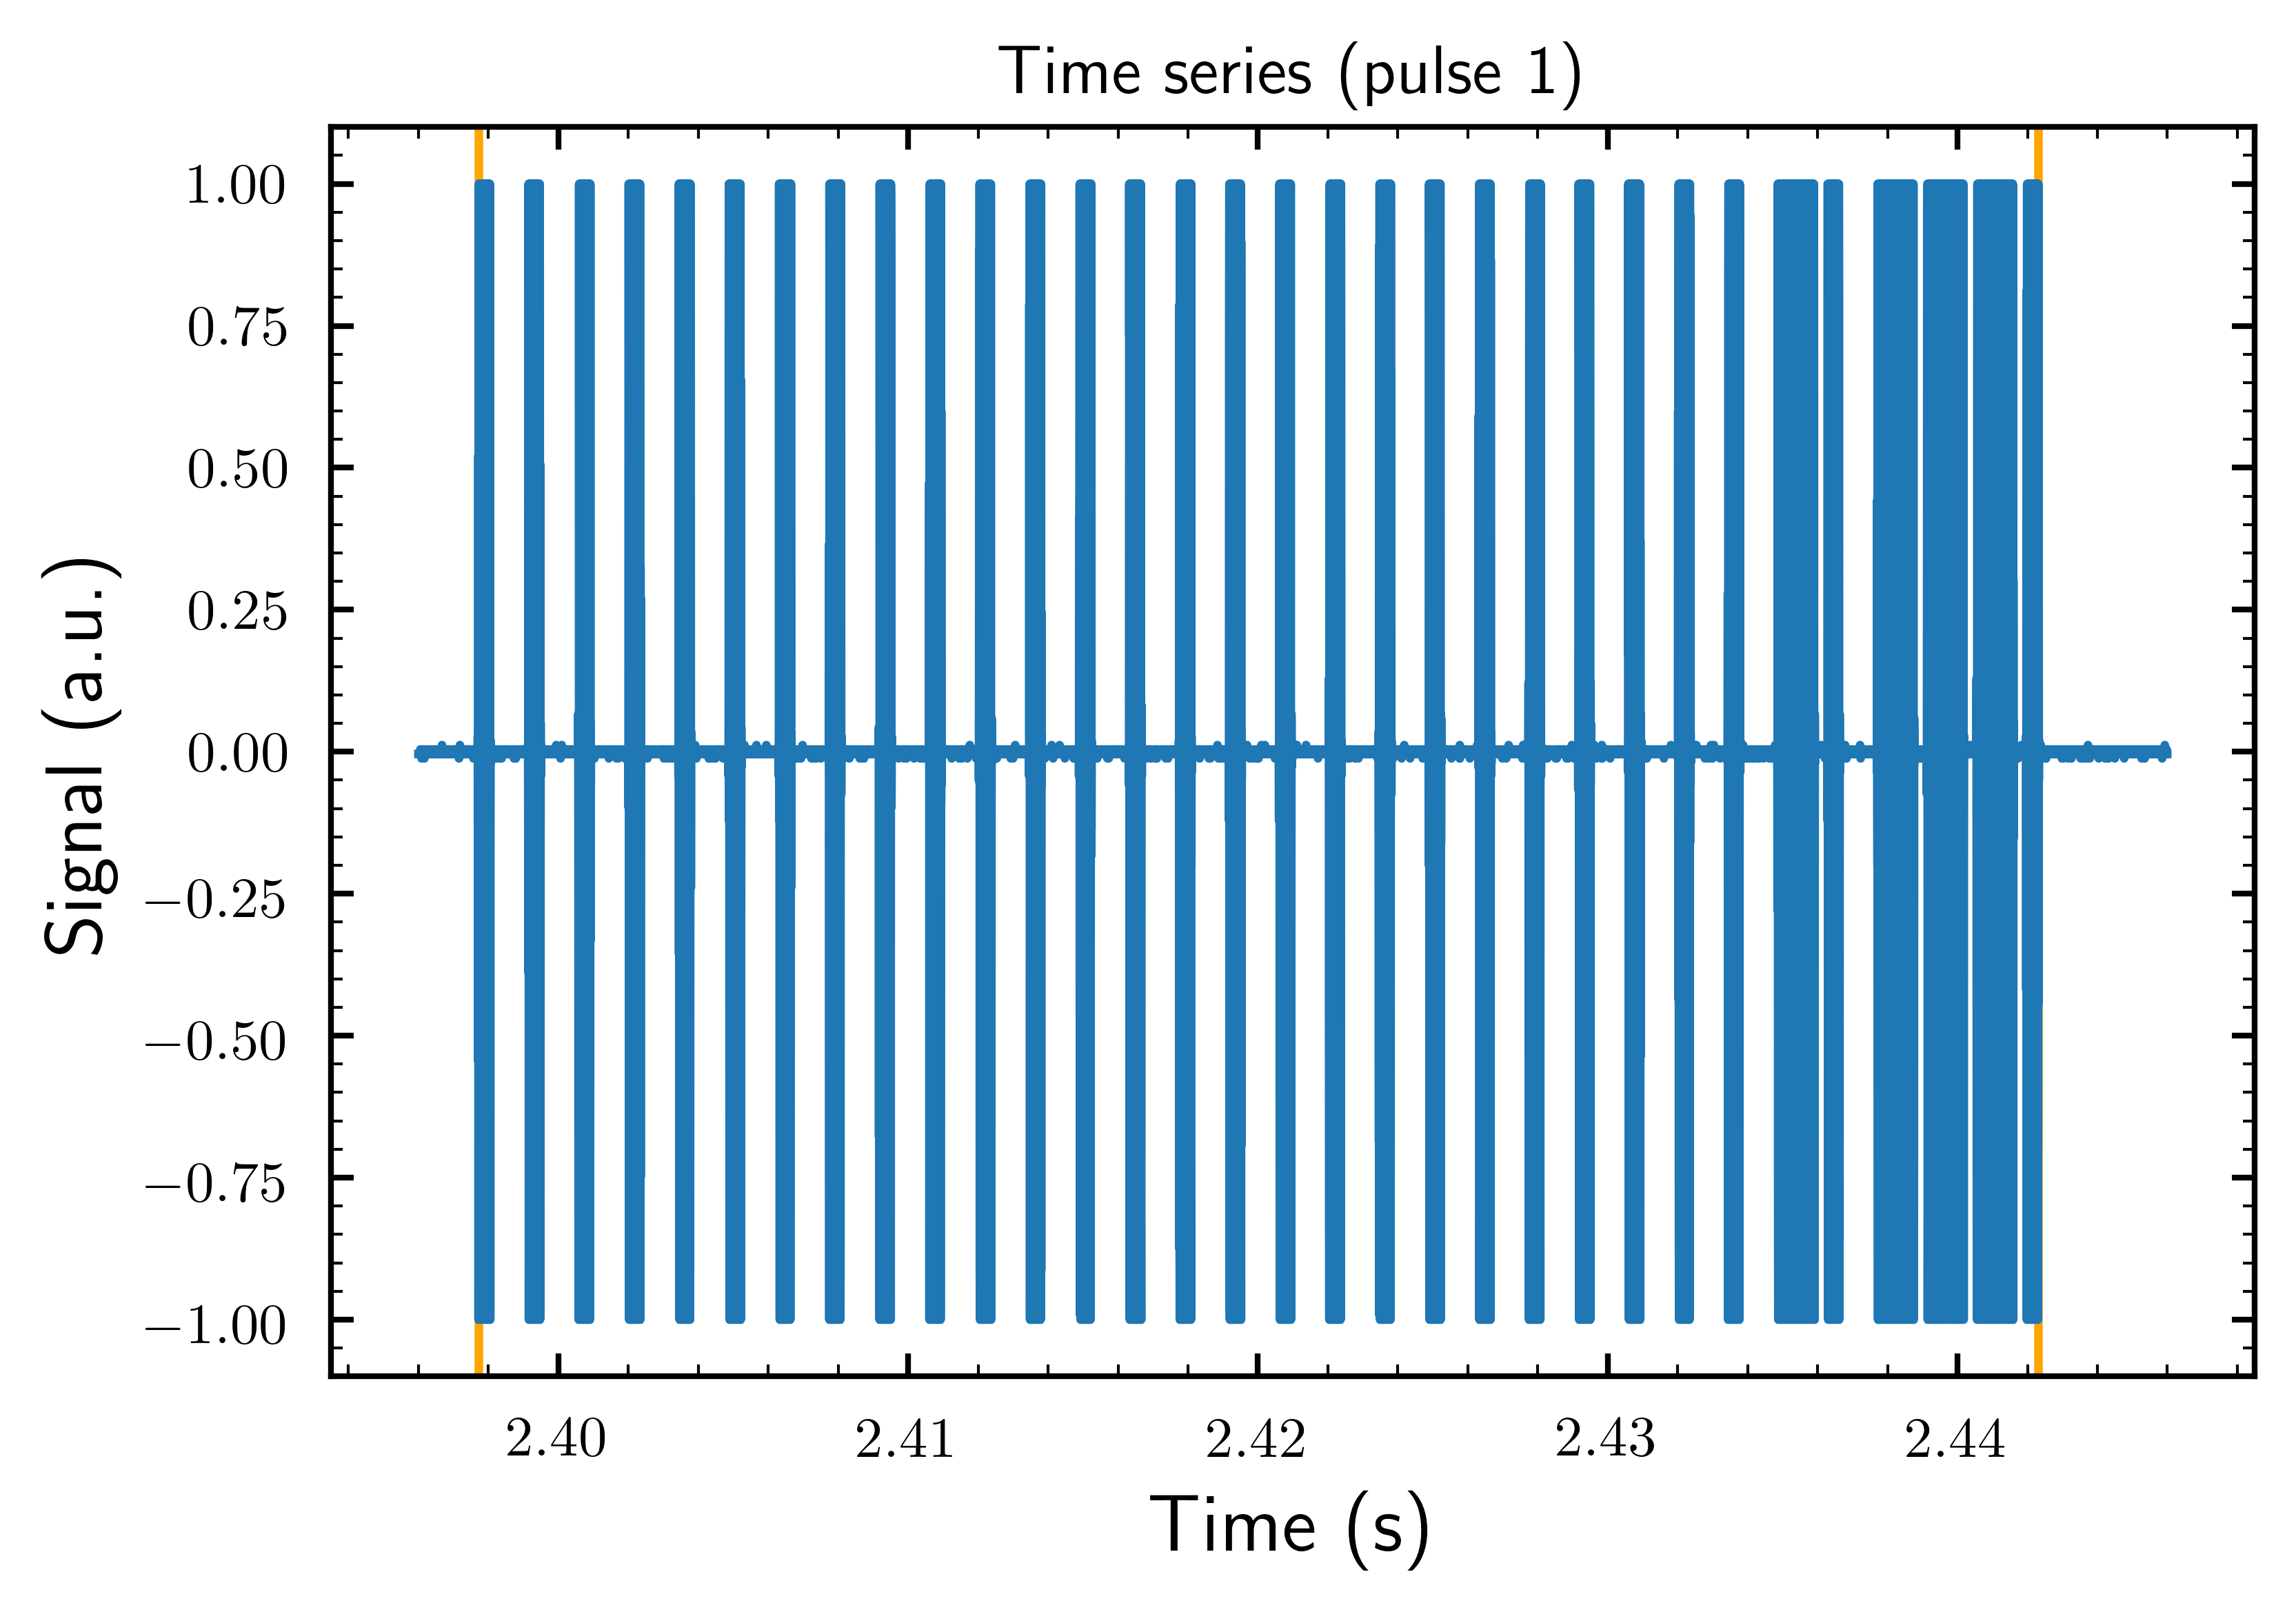

In [91]:
t, s = select_time_window(time, signal, 2.396, 2.446)

pulse1_start = t[np.argmax(s)]
pulse1_stop = t[::-1][np.argmax(s[::-1])]

plt.figure(dpi=300)
plt.title('Time series (pulse 1)')
plt.axvline(pulse1_start, color='orange')
plt.axvline(pulse1_stop, color='orange')
plt.plot(t[::10], s[::10].real)
plt.xlabel('Time (s)')
plt.ylabel('Signal (a.u.)')
plt.show()

In [101]:
pulse1_length = pulse1_stop - pulse1_start
pulse1_length

0.04458106012952401

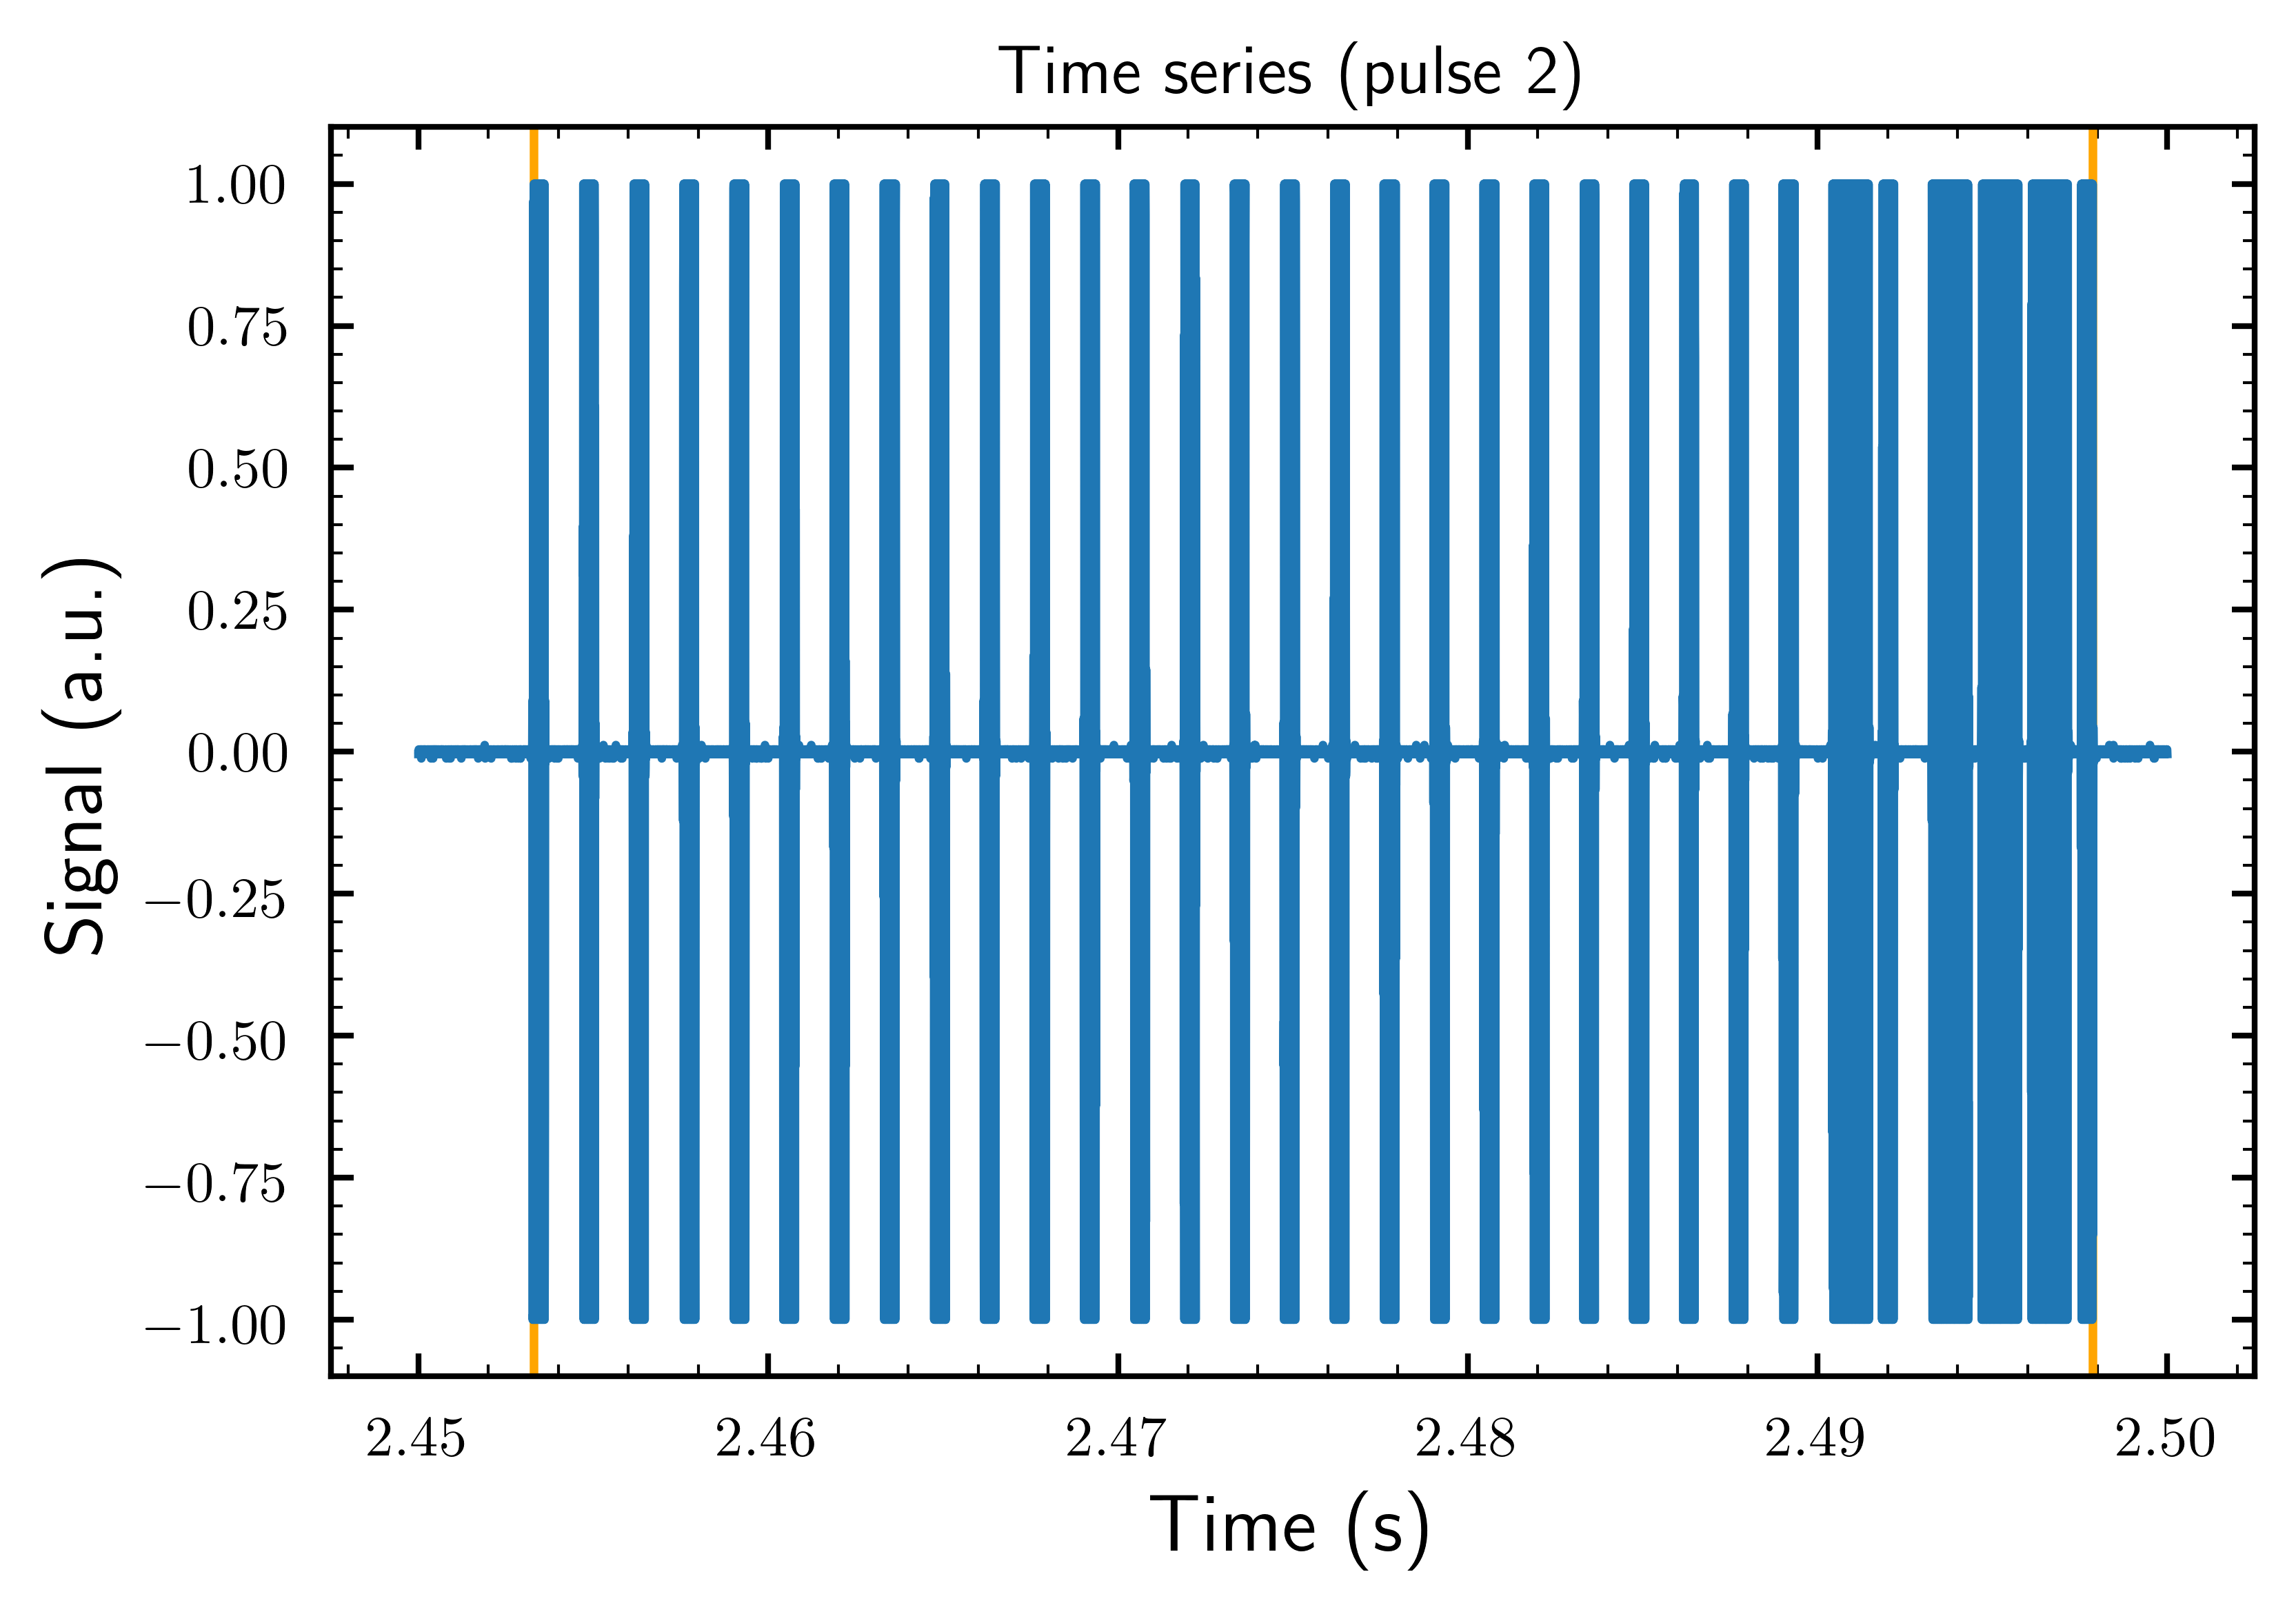

In [100]:
t, s = select_time_window(time, signal, 2.45, 2.5)

pulse2_start = t[np.argmax(s)]
pulse2_stop = t[::-1][np.argmax(s[::-1])]

plt.figure(dpi=300)
plt.title('Time series (pulse 2)')
plt.axvline(pulse2_start, color='orange')
plt.axvline(pulse2_stop, color='orange')
plt.plot(t[::10], s[::10].real)
plt.xlabel('Time (s)')
plt.ylabel('Signal (a.u.)')
plt.show()

In [102]:
pulse2_length = pulse2_stop - pulse2_start
pulse2_length

0.044559087470591674

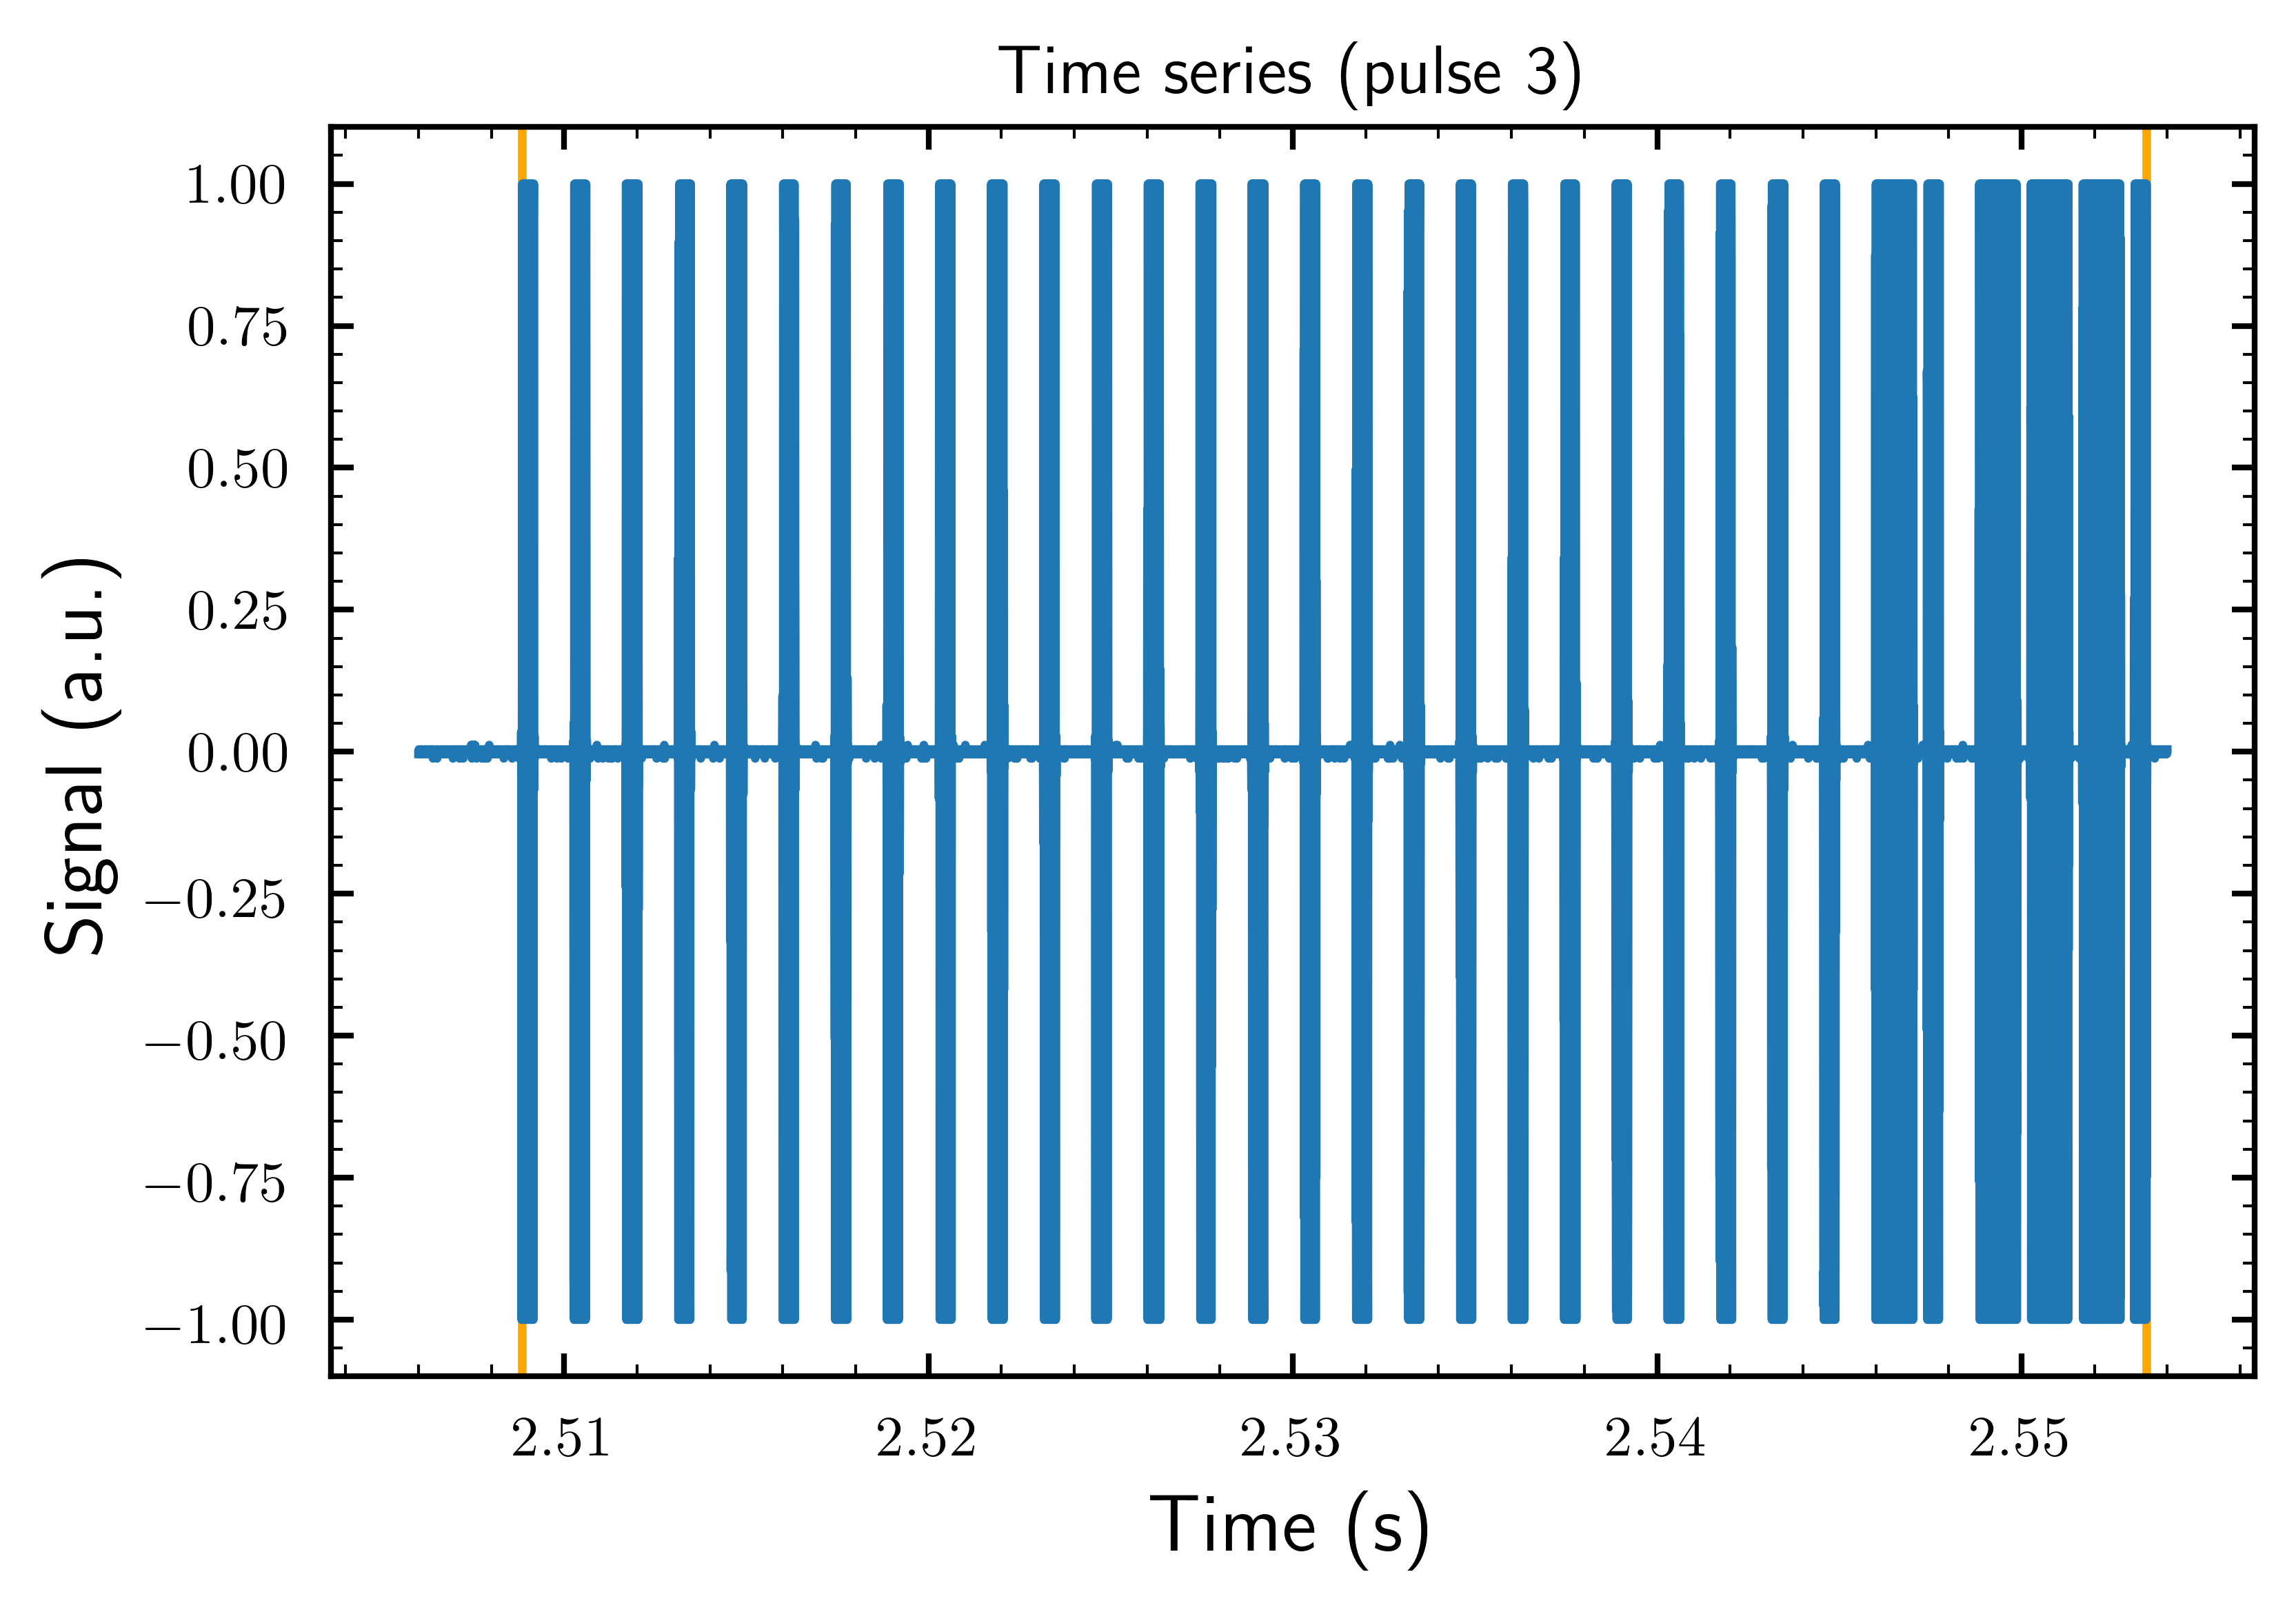

In [113]:
t, s = select_time_window(time, signal, 2.506, 2.554)

pulse3_start = t[np.argmax(s)]
pulse3_stop = t[::-1][np.argmax(s[::-1])]

plt.figure(dpi=300)
plt.title('Time series (pulse 3)')
plt.axvline(pulse3_start, color='orange')
plt.axvline(pulse3_stop, color='orange')
plt.plot(t[::10], s[::10].real)
plt.xlabel('Time (s)')
plt.ylabel('Signal (a.u.)')
plt.show()

In [114]:
pulse3_length = pulse3_stop - pulse3_start
pulse3_length

0.04457715387904715

In [115]:
pulse_length = np.mean([pulse1_length, pulse2_length, pulse3_length])
pulse_length

0.04457243382638761

In [116]:
pulse_distance = np.mean([pulse2_start - pulse1_stop, pulse3_start - pulse2_stop])
pulse_distance

0.01099072399789125

In [117]:
num_pulses = 10

pulse_starts = pulse_train_start + np.arange(num_pulses) * (pulse_length + pulse_distance)

fig, axes = plt.subplots(nrows=num_pulses, sharex=True, dpi=300, figsize=(12, 20))
#fig.suptitle('Time series (pulses)')
for ax, pulse_start in zip(axes, pulse_starts):
    tstart = pulse_start - 0.002
    tstop = tstart + pulse_length + 0.004
    t, s = select_time_window(time, signal, tstart, tstop)

    t0 = t[np.argmax(s)] - pulse_start
    t1 = t[::-1][np.argmax(s[::-1])] - pulse_start

    #t, s = select_time_window(time, signal, t0 - 0.002, t0 + pulse_length + 0.002)
    ax.axvline(t0, color='orange')
    ax.axvline(t1, color='orange')
    ax.plot(t[::10] - pulse_start, s[::10].real)
    ax.set_ylabel('Signal (a.u.)')

plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()